# Matplotlib 基本元素

Matplotlib 是一个用于在 Python 中创建数据可视化的强大库。Jupyter Notebook 的交互式环境使得 Matplotlib 成为展示和分析数据的理想工具。在本教程中，我们将深入探讨 Matplotlib 的基础知识，包括如何创建和自定义各种类型的图表。

首先，让我们导入 Matplotlib 以及其他我们将会用到的库：

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from matplotlib.patches import Circle, Wedge, Rectangle, Polygon
from matplotlib.collections import PatchCollection

## 基本元素

在 Matplotlib 中，所有的图形都是由基本元素（primitives）和容器（containers）组成。基本元素包括了诸如线条（Line2D）、矩形（Rectangle）、多边形（Polygon）和图像（image）等，而容器则包括了图（Figure）和子图（Axes）。接下来，我们将逐一介绍这些基本元素。

### 2DLines

线条是 Matplotlib 中的基本元素之一，用于绘制图表中的线。在 Matplotlib 中，线条可以是实线、虚线或由各种不同标记（markers）构成的点线。

#### 创建 Line2D

创建线条的一种方法是使用 `Line2D` 类。这个类的构造函数允许我们详细地自定义线条的外观：

```python
Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, ...)
```

- `xdata`, `ydata`: 确定线条上点的位置。
- `linewidth`: 线条的宽度。
- `linestyle`: 线条的样式，例如实线、虚线等。
- `color`: 线条的颜色。
- `marker`: 点的标记样式。

#### 设置 Line2D 属性

您可以通过多种方式设置线条的属性：

1. 在 `plot()` 函数中直接设置。
2. 获取线条对象后，调用其方法设置。
3. 使用 `setp()` 函数设置。

以下是一些示例：

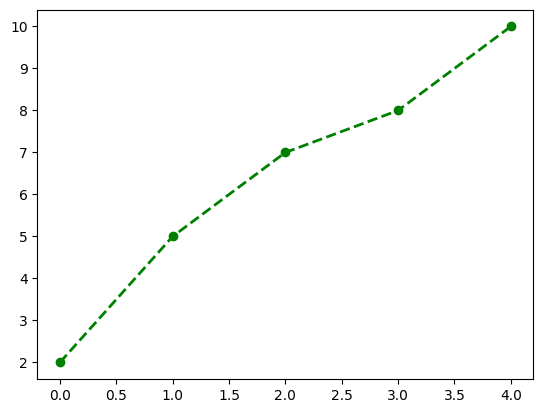

In [56]:
# 1) 在 plot() 函数中直接设置
x = range(0, 5)
y = [2, 5, 7, 8, 10]
plt.plot(x, y, linewidth=2, linestyle='--', color='g', marker='o')
plt.show()

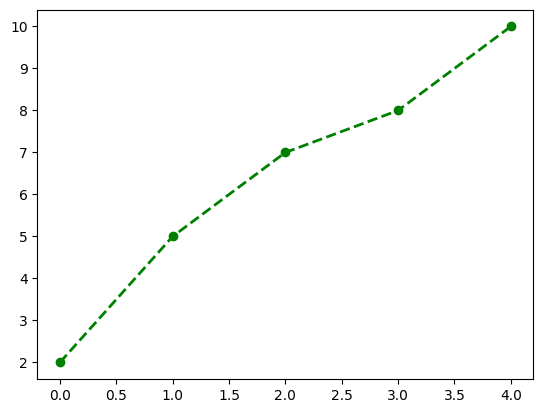

In [6]:
# 2) 获取线条对象后，调用其方法设置
line, = plt.plot(x, y)
line.set_linewidth(2)
line.set_linestyle('--')
line.set_color('g')
line.set_marker('o')
plt.show()

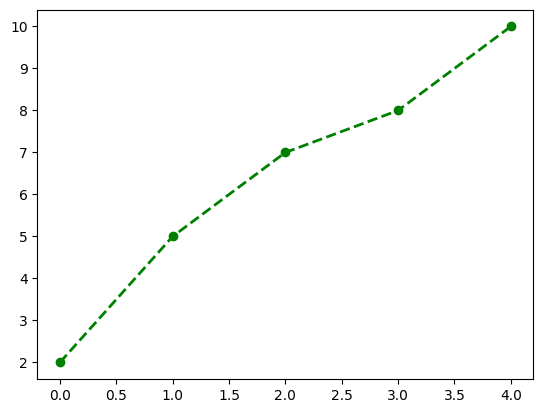

In [7]:
# 3) 使用 setp() 函数设置
line, = plt.plot(x, y)
plt.setp(line, linewidth=2, linestyle='--', color='g', marker='o')
plt.show()

#### 绘制线条

在 Matplotlib 中，最常见的绘制线条的方法是使用 `plot` 方法

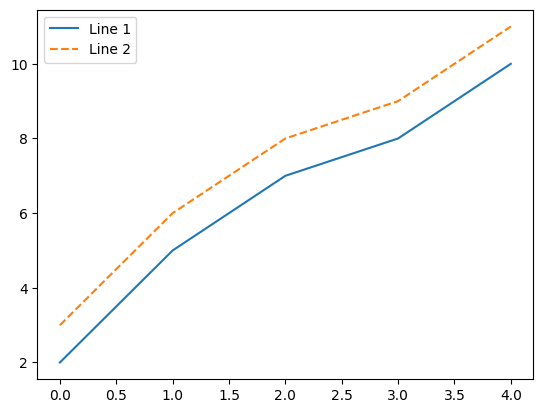

In [23]:
x = range(0, 5)
y1 = [2, 5, 7, 8, 10]
y2 = [3, 6, 8, 9, 11]

plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2', linestyle='--')
plt.legend()
plt.show()

#### 绘制误差线

`errorbar()` 函数允许我们在数据点周围绘制误差线，表示数据的不确定性：

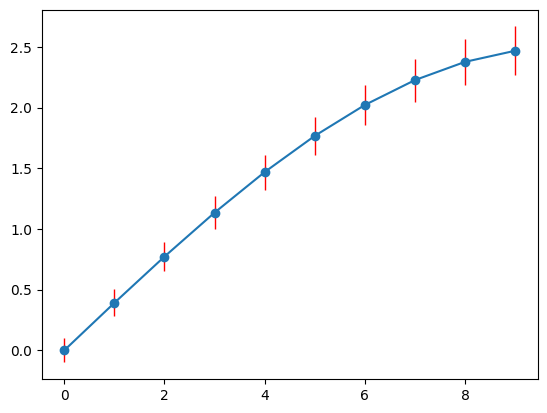

In [24]:
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.1, 0.2, 10)

plt.errorbar(x, y, yerr=yerr, fmt='-o', ecolor='red', elinewidth=1)
plt.show()

### Patch

在`matplotlib`库中，`patches`模块提供了一系列用于绘制多种二维图形的类，这些类可以用于在图表中添加形状。`matplotlib.patches.Patch`类是所有这些二维图形类的基类，它提供了一些共通的属性和方法。下面是`Patch`类的构造函数：

```python
Patch(edgecolor=None, facecolor=None, color=None, linewidth=None, linestyle=None, antialiased=None, hatch=None, fill=True, capstyle=None, joinstyle=None, **kwargs)
```
在这个基础上，`matplotlib.patches`模块中定义了多种具体的形状类，如矩形（Rectangle）、多边形（Polygon）、楔形（Wedge）等。在本节中，我们将重点介绍这三种最常用的子类。args)

#### Rectangle（矩形）

`Rectangle`类用于绘制矩形，其构造函数如下：

```python
class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)
```

其中，`xy`参数指定了矩形左下角的点的坐标，`width`和`height`分别指定了矩形的宽度和高度。

##### 1) hist（直方图）

直方图是统计学中常用的数据分布图，`matplotlib.pyplot.hist`函数可以快速绘制直方
```python
matplotlib.pyplot.hist(x,bins=None,range=None, density=None, bottom=None, histtype='bar', align='mid', log=False, color=None, label=None, stacked=False, normed=None)
```
图。下面是`hist`函数中一些常用参数的含义：

- `x`: 数据集，直方图将对数据集进行统计。
- `bins`: 统计的区间分布。
- `range`: 显示的区间，`range`在没有给出`bins`时生效。
- `density`: 布尔值，默认为`False`。为`True`时显示频率统计结果。
- `histtype`: 直方图类型，可选`{'bar', 'barstacked', 'step', 'stepfilled'}`。
- `align`: 柱状图的对齐方式，可选`{'left', 'mid', 'right'}`。
- `log`: 布尔值，设置y轴的刻度是否为对数刻度。
- `stacked`: 布尔值，是否堆叠。

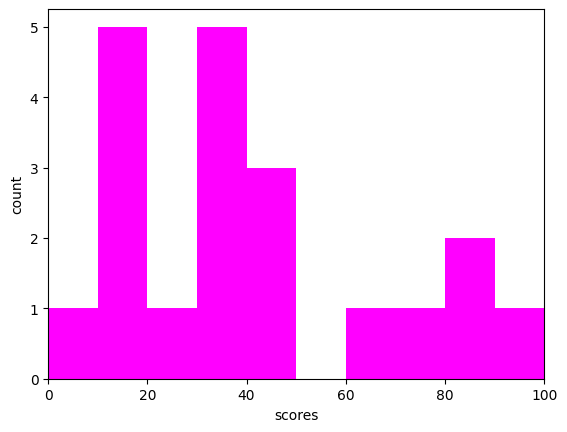

In [59]:
# 生成随机数据集
x = np.random.randint(0, 100, 20)
# 设置分布区间
bins = np.arange(0, 101, 10)
# 绘制直方图
plt.hist(x, bins=bins, color='fuchsia')
plt.xlabel('scores')
plt.ylabel('count')
plt.xlim(0, 100)
plt.show()

##### 2) bar（柱状图）

柱状图是表示数据分布的另一种图表，`matplotlib.pyplot.bar`函数可以用于绘制柱状
```python
matplotlib.pyplot.bar(left, height, alpha=1, width=0.8, color=, edgecolor=, label=, lw=3)
```

图。下面是`bar`函数中一些常用参数的含义：

- `left`: x轴的位置序列。
- `height`: y轴的数值序列，即柱形图的高度。
- `alpha`: 透明度。
- `width`: 柱形图的宽度。
- `color`或`facecolor`: 柱形图填充的颜色。
- `edgecolor`: 图形边缘颜色。
- `label`: 为每个柱形图提供标签，用于图例说明。

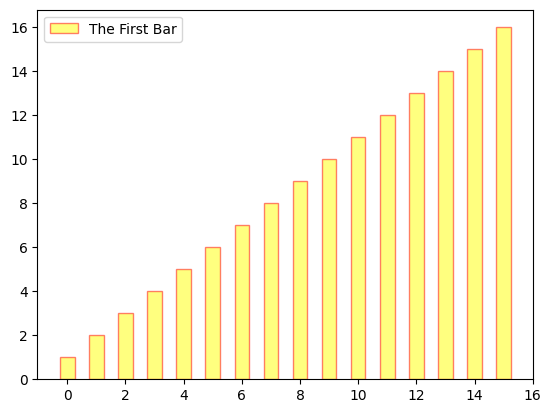

In [64]:
# bar绘制柱状图示例
y = range(1, 17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar')
plt.legend()
plt.show()

#### Polygon（多边形）

`Polygon`类用于绘制多边形，其构造函数如下：

`matplotlib.patches.Polygon`类是多边形类。它的构造函数：
```python
class matplotlib.patches.Polygon(xy, closed=True, **kwargs)
```
- `xy`：这是一个 Nx2 的 numpy 数组或者是 `[x, y]` 对的序列，代表多边形的顶点。
- `closed`：这是一个布尔值（True 或 False）。如果为 True，则多边形将闭合，即起点和终点是相同的。
- `**kwargs`：这些是可以用来设置多边形各种属性的额外关键字参数，如：
  - `facecolor`：多边形的填充颜色，可以是任何matplotlib颜色。
  - `edgecolor`：多边形边缘的颜色，可以是任何matplotlib颜色。
  - `linewidth`：边缘线的宽度。
  - `alpha`：填充颜色的透明度级别，0 表示完全透明，1 表示完全不透明。

`matplotlib.patches.Polygon`类中常用的是`fill`类，它是基于xy绘制一个填充的多边形，它的定义：
```python
matplotlib.pyplot.fill(*args, data=None, **kwargs)
```

- `*args`：这些是多边形顶点的 x 和 y 坐标。可以作为分开的序列（例如，`x, y`）或者 `(x, y)` 元组的序列传递。
- `data`：一个可选参数，允许指定数据的来源。
- `**kwargs`：额外的关键字参数，用于指定多边形的属性，与 `matplotlib.patches.Polygon` 中使用的类似。一些常见的包括：
  - `color`：填充多边形的颜色。
  - `edgecolor`：多边形边缘的颜色。
  - `alpha`：填充颜色的不透明度级别。

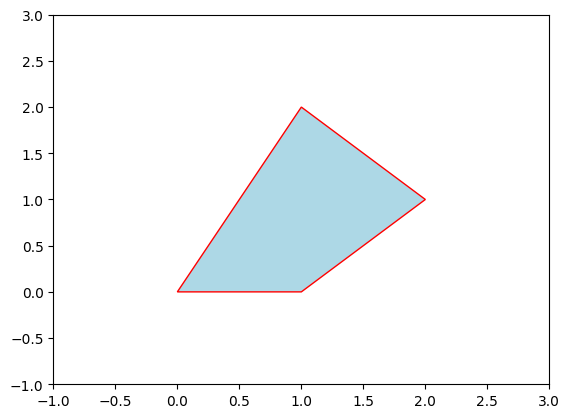

In [66]:
# 1) 使用 Polygon

# 创建一个多边形的顶点数组
polygon_points = np.array([[0, 0], [1, 2], [2, 1], [1, 0]])

# 创建一个Polygon对象
polygon = Polygon(polygon_points, closed=True, facecolor='lightblue', edgecolor='red')

# 创建一个图和一个子图
fig, ax = plt.subplots()

# 将多边形添加到子图上
ax.add_patch(polygon)

# 设置坐标轴的限制
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)

# 显示图形
plt.show()

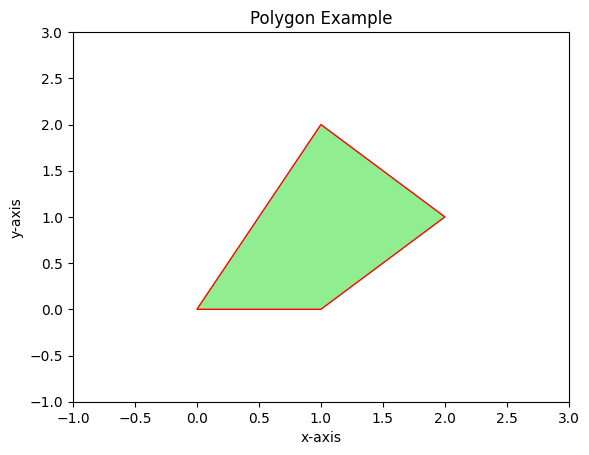

In [67]:
# 2) 使用fill
# 定义多边形的顶点
x = [0, 1, 2, 1]
y = [0, 2, 1, 0]

# 使用fill函数绘制多边形并填充颜色
plt.fill(x, y, color='lightgreen',edgecolor='red')

# 设置图表标题和坐标轴标签
plt.title('Polygon Example')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# 设置坐标轴的范围
plt.xlim(-1, 3)
plt.ylim(-1, 3)

# 显示图形
plt.show()

#### Wedge（楔形）

`Wedge`类用于绘制楔形，其构造函数如下：

```python
class matplotlib.patches.Wedge(center, r, theta1, theta2, width=None, **kwargs)
```

其中主要参数含义如下:
- `center`: 扇区的中心坐标。可以是一个包含两个元素的元组或列表，表示扇区的中心点的 x 和 y 坐标。
- `r`: 扇区的半径。可以是一个标量值，表示扇区的半径长度。
- `theta1`: 扇区的起始角度。可以是一个标量值，表示扇区的起始角度（以度为单位）。
- `theta2`: 扇区的终止角度。可以是一个标量值，表示扇区的终止角度（以度为单位）。
- `width`: 扇区的宽度。可以是一个标量值，表示扇区的宽度（以半径的比例表示）。默认为`None`，表示绘制一个完整的扇区。
- `**kwargs`: 其他可选参数，用于进一步控制扇区的绘制。

##### 饼状图（Pie Chart）

饼状图是一种常见的表示比例的图表，`matplotlib.pyplot.pie`函数可以用于绘制饼状图。
```python
matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, normalize=None, data=None)
```


下面是`pie`函数中一些常用参数的含义：

- `x`: 饼图的数据。可以是一维数组或标量值。数组中的每个元素表示一个扇区的大小。
- `explode`: 控制每个扇区与饼图中心的偏移量。可以是一维数组或标量值。默认为`None`，表示不偏移任何扇区。
- `labels`: 每个扇区的标签。可以是一维数组或标量值。默认为`None`，表示不显示标签。
- `colors`: 每个扇区的颜色。可以是一维数组或标量值。默认为`None`，表示使用默认的颜色。
- `autopct`: 扇区上显示的百分比格式。可以是字符串或函数。默认为`None`，表示不显示百分比。
- `pctdistance`: 百分比标签与圆心的距离。默认为0.6，表示距离为扇区半径的0.6倍。
- `shadow`: 是否显示阴影效果。默认为`False`，表示不显示阴影。
- `labeldistance`: 标签与圆心的距离。默认为1.1，表示距离为扇区半径的1.1倍。
- `startangle`: 起始角度。默认为0，表示从正上方开始绘制饼图。
- `radius`: 饼图的半径。默认为1，表示半径为1。
- `counterclock`: 扇区绘制的方向。默认为`True`，表示逆时针方向绘制扇区。
- `wedgeprops`: 扇区的属性设置。可以是字典或关键字参数。默认为`None`，表示使用默认的扇区属性。
- `textprops`: 文本标签的属性设置。可以是字典或关键字参数。默认为`None`，表示使用默认的文本属性。
- `center`: 饼图的中心坐标。默认为`(0, 0)`，表示中心在坐标原点。
- `frame`: 是否显示饼图的边框。默认为`False`，表示不显示边框。
- `rotatelabels`: 是否旋转标签。默认为`False`，表示不旋转标签。
- `normalize`: 是否对数据进行归一化。默认为`None`，表示不进行归一化。
- `data`: 饼图的数据。默认为`None`，表示没有数据。

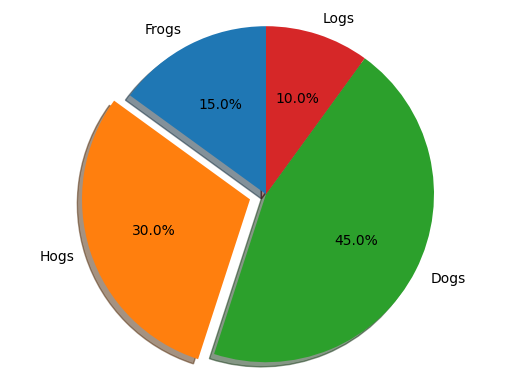

In [78]:
# pie绘制饼状图示例
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
x = [15, 30, 45, 10]
explode = (0,0.1,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(x, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Collections

Collections 是用于绘制一组对象的容器，例如散点图就是由一组点的集合构成。

#### 绘制散点图

```python
Axes.scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
```
其中最主要的参数如下：

- `x`、`y`: 散点的 x 坐标和 y 坐标。可以是一维数组或标量值。
- `s`: 散点的大小。可以是标量值或与 `x`、`y` 相同长度的一维数组。默认为`None`，表示使用默认的散点大小。
- `c`: 散点的颜色。可以是标量值、一维数组或与 `x`、`y` 相同长度的一维数组。默认为`None`，表示使用默认的散点颜色。
- `marker`: 散点的标记样式。默认为`None`，表示使用默认的标记样式。常用的标记样式有'.'（小圆点）、's'（正方形）、'^'（上三角形）等。
- `cmap`: 颜色映射（colormap）用于将数据值映射到颜色。默认为`None`，表示使用默认的颜色映射。常用的颜色映射有'viridis'、'gray'、'jet'等。
- `norm`: 归一化对象，用于将数据值映射到[0, 1]区间。默认为`None`，表示不进行归一化。
- `vmin`、`vmax`: 数据值的最小值和最大值，用于控制颜色映射的范围。默认为`None`，表示使用数据的最小值和最大值。
- `alpha`: 散点的透明度。默认为`None`，表示不透明。
- `linewidths`: 散点边界线的宽度。可以是标量值或与 `x`、`y` 相同长度的一维数组。默认为`None`，表示使用默认的边界线宽度。
- `verts`: 自定义散点的顶点坐标。默认为`None`，表示不使用自定义顶点坐标。
- `edgecolors`: 散点边界线的颜色。可以是标量值、一维数组或与 `x`、`y` 相同长度的一维数组。默认为`None`，表示使用默认的边界线颜色。
- `plotnonfinite`: 控制是否绘制非有限数值的散点。默认为`False`，表示不绘制非有限数值的散点。
- `data`: 散点的数据。默认为`None`，表示没有数据。
- `**kwargs`: 其他可选参数，用于进一步控制散点的绘制。

  
散点图是数据点的集合，可以通过 `scatter()` 方法轻松创建：

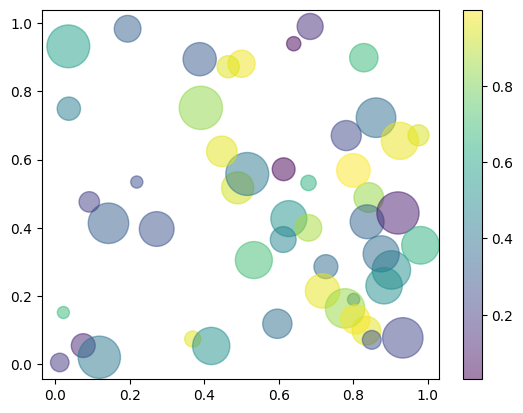

In [82]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)
sizes = 1000 * np.random.rand(50)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.colorbar()  # 显示颜色条
plt.show()

### Images

`imshow()` 函数可以根据二维数组创建图像，这在处理图像数据时非常有用。

```python
matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=, filternorm=1, filterrad=4.0, imlim=, resample=None, url=None, *, data=None, **kwargs）
```
主要参数含义如下:
- `X`: 要显示的图像数据。可以是一个二维数组（灰度图像）或三维数组（彩色图像），也可以是PIL图像对象。
- `cmap`: 颜色映射（colormap）用于将数据值映射到颜色。默认为`None`，表示使用默认的颜色映射。常用的颜色映射有'viridis'、'gray'、'jet'等。
- `norm`: 归一化对象，用于将数据值映射到[0, 1]区间。默认为`None`，表示不进行归一化。
- `aspect`: 图像的宽高比（宽度除以高度）。默认为`None`，表示使用默认的宽高比。
- `interpolation`: 插值方法，用于控制图像的显示效果。常用的插值方法有'nearest'（最近邻插值）、'bilinear'（双线性插值）、'bicubic'（双三次插值）等。
- `alpha`: 图像的透明度。默认为`None`，表示不透明。
- `vmin`、`vmax`: 数据值的最小值和最大值，用于控制颜色映射的范围。默认为`None`，表示使用数据的最小值和最大值。
- `origin`: 图像的原点位置。默认为`None`，表示原点在左上角。可选值为'upper'（原点在左上角）或'lower'（原点在左下角）。
- `extent`: 图像的坐标范围。默认为`None`，表示使用默认的坐标范围。
- `shape`: 图像的形状。默认为`None`，表示使用图像数据的形状。
- `filternorm`、`filterrad`: 控制图像的滤波器参数。默认的滤波器参数为1和4.0。
- `imlim`: 图像的显示限制。默认为`None`，表示使用默认的显示限制。
- `resample`: 图像的重采样方法。默认为`None`，表示使用默认的重采样方法。
- `url`: 图像的URL地址。默认为`None`，表示没有URL地址。
- `data`: 图像的数据。默认为`None`，表示没有数据。
- `**kwargs`: 其他可选参数，用于进一步控制图像的显示。

下面是一个简单的示例，展示如何使用 `imshow()` 显示一个随机矩阵：

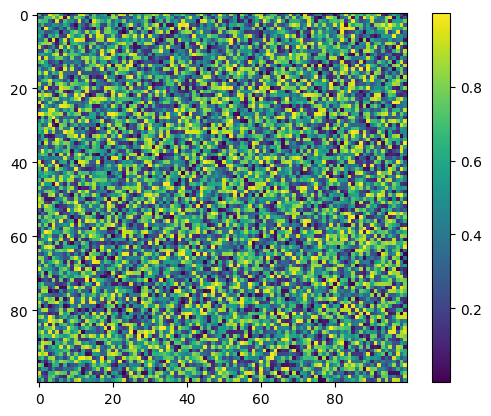

In [83]:
# 创建一个随机矩阵并显示它
matrix_data = np.random.rand(100, 100)
plt.imshow(matrix_data, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()